Exploratory Data Analysis:

1. Understanding the data and problem.
2. Import and inspect the data.
3. Handle missing data.
4. Explorate data characteristics.
5. Perform data transformation.
6. Visualize data relationship.
7. Handle outliers.
8. Communicate findings and insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Import and Inspect the data

In [2]:
cancer_data = pd.read_csv(r'C:/Users/ht/Downloads/_cancer_dataset_uae.csv')
cancer_data.head()

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160


In [3]:
# Data Information

cancer_data.info()
cancer_data.describe()
cancer_data.isnull().sum()
cancer_data.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Patient_ID            10000 non-null  object
 1   Age                   10000 non-null  int64 
 2   Gender                10000 non-null  object
 3   Nationality           10000 non-null  object
 4   Emirate               10000 non-null  object
 5   Diagnosis_Date        10000 non-null  object
 6   Cancer_Type           10000 non-null  object
 7   Cancer_Stage          10000 non-null  object
 8   Treatment_Type        10000 non-null  object
 9   Treatment_Start_Date  10000 non-null  object
 10  Hospital              10000 non-null  object
 11  Primary_Physician     10000 non-null  object
 12  Outcome               10000 non-null  object
 13  Death_Date            992 non-null    object
 14  Cause_of_Death        992 non-null    object
 15  Smoking_Status        10000 non-null 

(10000, 20)

In [4]:
# Check for missing values

cancer_data.isna().sum()

Patient_ID                 0
Age                        0
Gender                     0
Nationality                0
Emirate                    0
Diagnosis_Date             0
Cancer_Type                0
Cancer_Stage               0
Treatment_Type             0
Treatment_Start_Date       0
Hospital                   0
Primary_Physician          0
Outcome                    0
Death_Date              9008
Cause_of_Death          9008
Smoking_Status             0
Comorbidities           4047
Ethnicity                  0
Weight                     0
Height                     0
dtype: int64

In [5]:
# View the row with missing values

cancer_data[cancer_data['Cause_of_Death'].isna()]

,Patient_ID,Age,Gender,Nationality,Emirate,Diagnosis_Date,Cancer_Type,Cancer_Stage,Treatment_Type,Treatment_Start_Date,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity,Weight,Height
0,PAT000001,69,Female,Emirati,Umm Al Quwain,2020-11-30,Liver,II,Radiation,2020-12-04,Sheikh Khalifa Hospital,Dr. VO41,Recovered,NaN,NaN,Non-Smoker,NaN,European,61,157
1,PAT000002,32,Male,Emirati,Umm Al Quwain,2015-10-10,Leukemia,III,Surgery,2015-11-05,Dubai Hospital,Dr. SM31,Recovered,NaN,NaN,Smoker,NaN,South Asian,80,175
2,PAT000003,89,Male,Emirati,Abu Dhabi,2018-02-13,Liver,III,Radiation,2018-08-03,Zayed Military Hospital,Dr. BC7,Under Treatment,NaN,NaN,Non-Smoker,NaN,South Asian,50,175
3,PAT000004,78,Female,Emirati,Abu Dhabi,2022-02-04,Lung,III,Radiation,2022-03-13,Cleveland Clinic Abu Dhabi,Dr. TC14,Recovered,NaN,NaN,Former Smoker,NaN,African,44,155
4,PAT000005,38,Female,Emirati,Fujairah,2019-12-03,Pancreatic,II,Chemotherapy,2020-02-29,Sheikh Khalifa Hospital,Dr. YS37,Recovered,NaN,NaN,Former Smoker,NaN,East Asian,101,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,PAT009996,88,Male,Emirati,Ras Al Khaimah,2016-01-21,Ovarian,II,Surgery,2016-04-03,Sheikh Khalifa Hospital,Dr. FJ27,Recovered,NaN,NaN,Smoker,Cardiovascular Disease,European,55,168
9996,PAT009997,43,Male,Emirati,Sharjah,2018-12-06,Ovarian,III,Radiation,2019-03-23,Cleveland Clinic Abu Dhabi,Dr. JB17,Under Treatment,NaN,NaN,Non-Smoker,Diabetes,African,98,175
9997,PAT009998,63,Female,Emirati,Sharjah,2016-06-11,Lung,III,Chemotherapy,2016-10-21,Dubai Hospital,Dr. ZG45,Under Treatment,NaN,NaN,Non-Smoker,NaN,East Asian,92,165
9998,PAT009999,63,Female,Emirati,Abu Dhabi,2018-11-12,Lung,IV,Immunotherapy,2019-02-05,Cleveland Clinic Abu Dhabi,Dr. EL16,Recovered,NaN,NaN,Smoker,Hypertension,European,68,193


In [6]:
# Check for duplicates
cancer_data.duplicated().sum()

0

Convert the Data Types

In [7]:
# Checking the data types
cancer_data['Diagnosis_Date'].dtypes
cancer_data['Treatment_Start_Date'].dtypes

dtype('O')

In [8]:
import datetime as dt

# Convert the 'Death_Date' and 'Treatment_Start_Date' column to datetime format
cancer_data['Diagnosis_Date'] = pd.to_datetime(cancer_data['Diagnosis_Date'], format='%Y-%m-%d')
cancer_data['Treatment_Start_Date'] = pd.to_datetime(cancer_data['Treatment_Start_Date'], format='%Y-%m-%d')

In [9]:
# Verify the conversion

cancer_data[['Diagnosis_Date','Treatment_Start_Date']]



,Diagnosis_Date,Treatment_Start_Date
0,2020-11-30,2020-12-04
1,2015-10-10,2015-11-05
2,2018-02-13,2018-08-03
3,2022-02-04,2022-03-13
4,2019-12-03,2020-02-29
...,...,...
9995,2016-01-21,2016-04-03
9996,2018-12-06,2019-03-23
9997,2016-06-11,2016-10-21
9998,2018-11-12,2019-02-05


In [10]:
# Check the data types again

cancer_data[['Diagnosis_Date','Treatment_Start_Date']].dtypes

Diagnosis_Date          datetime64[ns]
Treatment_Start_Date    datetime64[ns]
dtype: object

Create Categories


In [12]:
# Check for the number of unique ages in the dataset

print('Count of unique ages:', cancer_data['Age'].nunique())

print('\n')
print('Unique ages:', cancer_data['Age'].unique())

Count of unique ages: 72


Unique ages: [69 32 89 78 38 41 20 39 70 19 47 55 81 77 50 75 66 76 59 79 64 68 72 24
 56 35 21 31 26 88 61 25 52 53 67 23 71 80 51 65 57 43 58 46 62 82 18 28
 22 45 29 40 54 44 60 30 49 83 74 87 73 36 85 34 86 33 37 84 48 42 63 27]


In [15]:
print(cancer_data['Age'].describe())

# Create new bins for age groups
twenty_fifth = cancer_data['Age'].quantile(0.25)
median = cancer_data['Age'].median()
seventy_fifth = cancer_data['Age'].quantile(0.75)
maximum = cancer_data['Age'].max()

# Create a label for each bin
bins = [0, twenty_fifth, median, seventy_fifth, maximum]
labels = ['young', 'middle_age','older_adults', 'elderly']

# Create a new column 'Age_Group' based on the bins and labels
cancer_data['Age_Group'] = pd.cut(cancer_data['Age'], bins=bins, labels=labels, include_lowest=True)



count    10000.000000
mean        53.539700
std         20.757324
min         18.000000
25%         36.000000
50%         53.000000
75%         72.000000
max         89.000000
Name: Age, dtype: float64


In [16]:
cancer_data[['Age_Group','Age']]

,Age_Group,Age
0,older_adults,69
1,young,32
2,elderly,89
3,elderly,78
4,middle_age,38
...,...,...
9995,elderly,88
9996,middle_age,43
9997,older_adults,63
9998,older_adults,63


Find Inconsistencies

In [17]:
# Finding any inconsistencies

for x in cancer_data.columns:
    if cancer_data[x].dtype == 'object':
        print(x, cancer_data[x].nunique())
        print(cancer_data[x].unique())
        print('\n')

Patient_ID 10000
['PAT000001' 'PAT000002' 'PAT000003' ... 'PAT009998' 'PAT009999'
 'PAT010000']


Gender 3
['Female' 'Male' 'Other']


Nationality 2
['Emirati' 'Expatriate']


Emirate 7
['Umm Al Quwain' 'Abu Dhabi' 'Fujairah' 'Ras Al Khaimah' 'Sharjah' 'Dubai'
 'Ajman']


Cancer_Type 8
['Liver' 'Leukemia' 'Lung' 'Pancreatic' 'Breast' 'Ovarian' 'Prostate'
 'Colorectal']


Cancer_Stage 4
['II' 'III' 'I' 'IV']


Treatment_Type 4
['Radiation' 'Surgery' 'Chemotherapy' 'Immunotherapy']


Hospital 4
['Sheikh Khalifa Hospital' 'Dubai Hospital' 'Zayed Military Hospital'
 'Cleveland Clinic Abu Dhabi']


Primary_Physician 8614
['Dr. VO41' 'Dr. SM31' 'Dr. BC7' ... 'Dr. WT6' 'Dr. JB17' 'Dr. SI45']


Outcome 3
['Recovered' 'Under Treatment' 'Deceased']


Death_Date 867
[nan '2024-12-22 00:00:00' '2022-08-01 00:00:00' '2020-03-31 00:00:00'
 '2023-05-18 00:00:00' '2022-07-29 00:00:00' '2019-03-12 00:00:00'
 '2018-04-15 00:00:00' '2020-09-18 00:00:00' '2020-06-16 00:00:00'
 '2023-01-11 00:00:00' '2024-

In [18]:
# Statistical view of the categorical columns

cancer_data.select_dtypes(include=['object']).describe()

,Patient_ID,Gender,Nationality,Emirate,Cancer_Type,Cancer_Stage,Treatment_Type,Hospital,Primary_Physician,Outcome,Death_Date,Cause_of_Death,Smoking_Status,Comorbidities,Ethnicity
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,992,992,10000,5953,10000
unique,10000,3,2,7,8,4,4,4,8614,3,867,2,3,3,5
top,PAT000001,Female,Emirati,Ajman,Leukemia,III,Radiation,Sheikh Khalifa Hospital,Dr. AJ25,Recovered,2022-06-28 00:00:00,Complications,Non-Smoker,Hypertension,South Asian
freq,1,4985,5920,1497,1314,3041,2519,2541,5,4931,3,507,5038,2945,2083


Visualizing Data Relationship

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


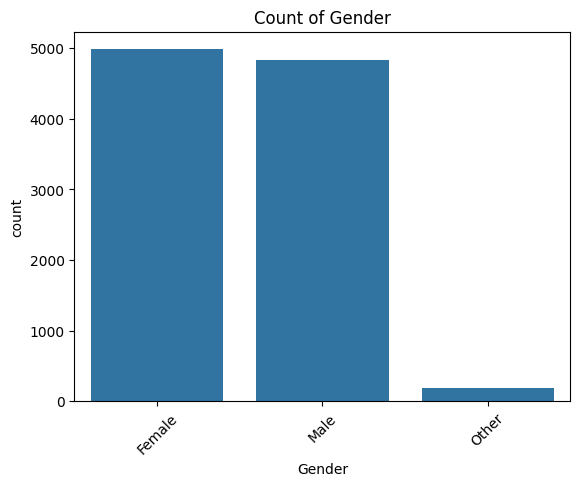

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


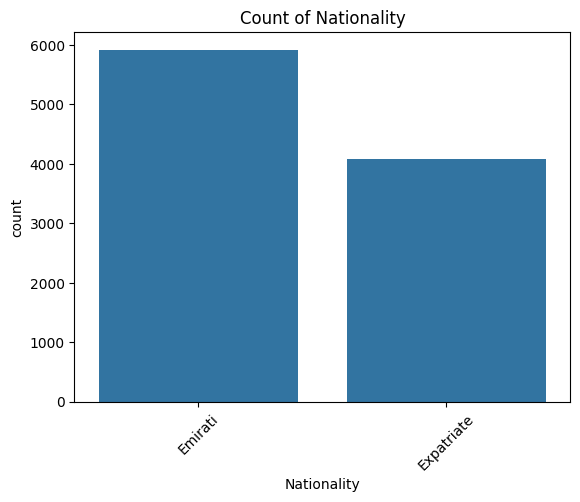

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


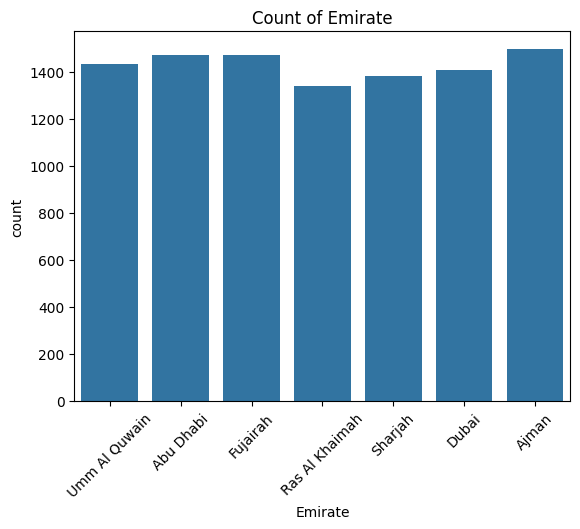

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


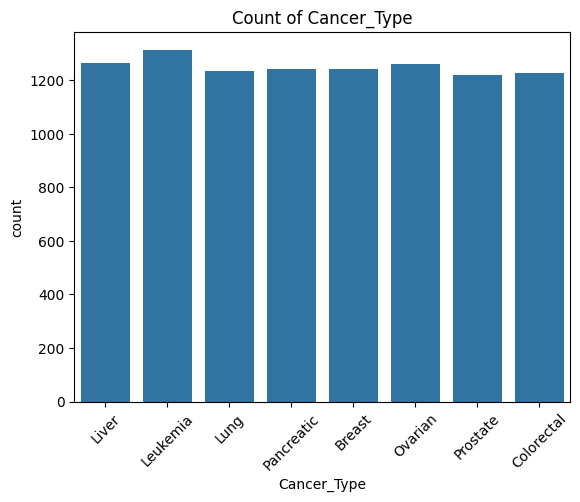

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


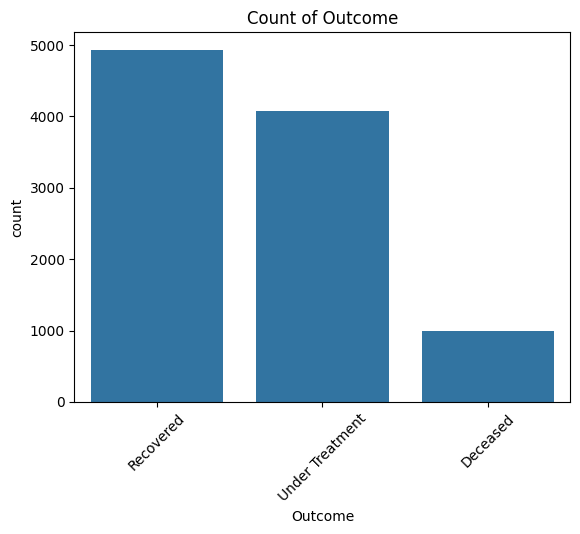

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


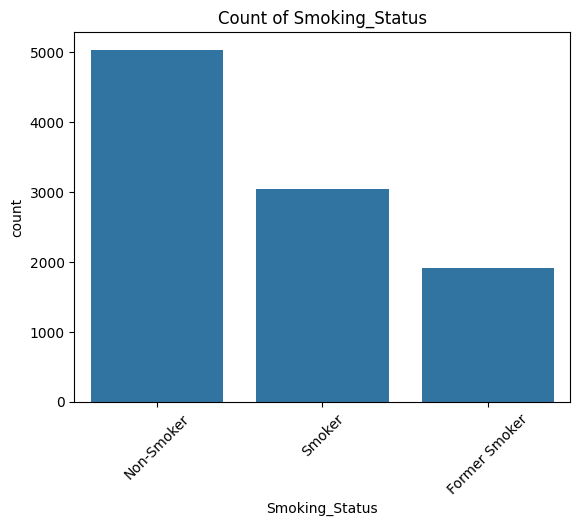

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


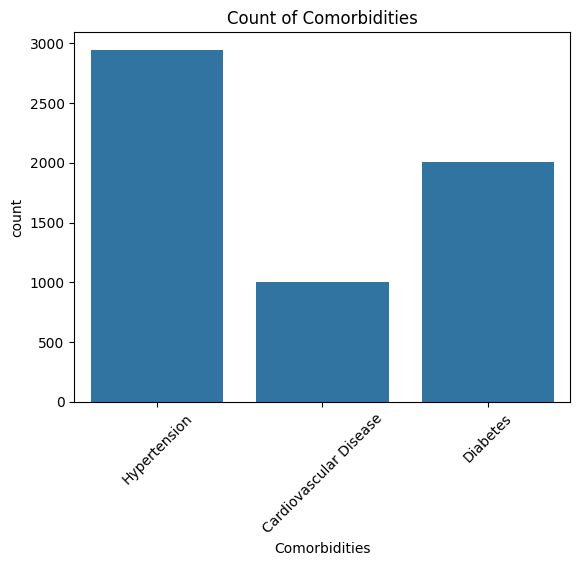

C:\Users\ht\AppData\Local\Temp\ipykernel_6512\1828081908.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=45)


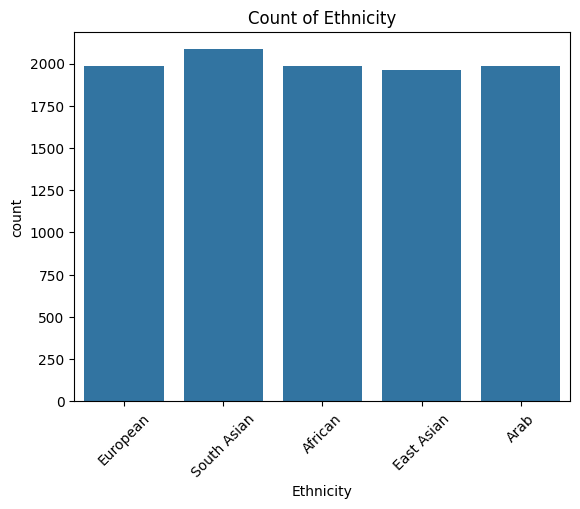

In [19]:
column_list = ['Gender', 'Nationality', 'Emirate', 'Cancer_Type', 'Outcome', 'Smoking_Status', 'Comorbidities', 'Ethnicity']

def plot_bar_graph():
    for c in column_list:
        g = sns.countplot(data=cancer_data, x=c)
        g.set_xticklabels(g.get_xticklabels(), rotation=45)
        plt.title(f'Count of {c}')
        plt.show()

plot_bar_graph()

In [20]:
# Statistical view of the numerical columns
cancer_data.select_dtypes(include=['int64', 'float64']).describe()

,Age,Weight,Height
count,10000.000000,10000.000000,10000.000000
mean,53.539700,69.550000,169.347500
std,20.757324,14.933339,10.070118
min,18.000000,18.000000,131.000000
25%,36.000000,60.000000,163.000000
50%,53.000000,70.000000,169.000000
75%,72.000000,80.000000,176.000000
max,89.000000,122.000000,208.000000


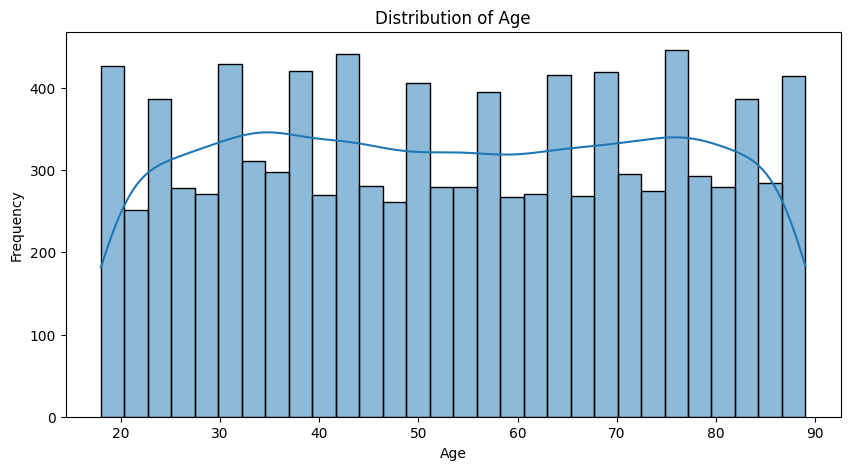

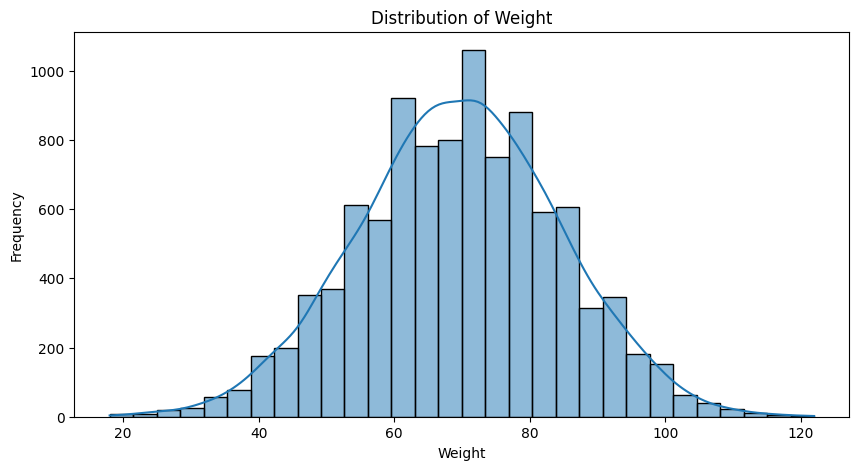

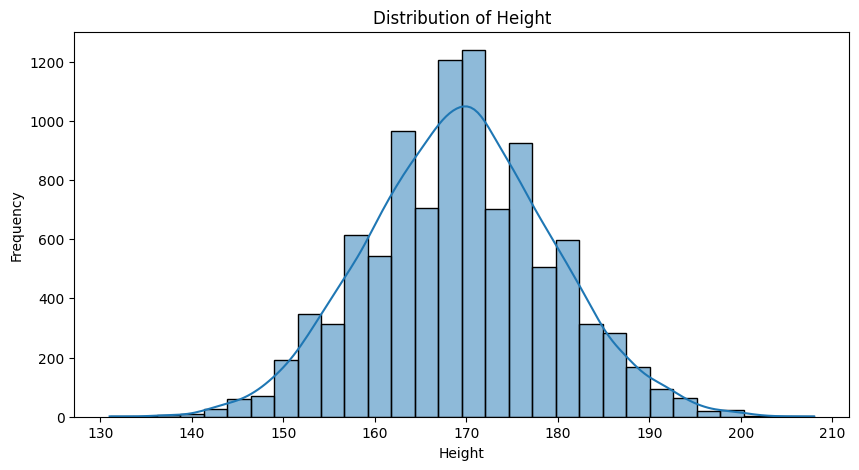

In [21]:
col = ['Age', 'Weight', 'Height']
def plot_histogram():
    for c in col:
        plt.figure(figsize=(10, 5))
        sns.histplot(cancer_data[c], bins=30, kde=True)
        plt.title(f'Distribution of {c}')
        plt.xlabel(c)
        plt.ylabel('Frequency')
        plt.show()

plot_histogram()